In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_insurance = pd.read_excel('Auto_Insurance_Claims_Propensity.xlsx')

In [3]:
data_insurance.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data_insurance.shape

(9134, 26)

In [5]:
data_insurance.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [6]:
# Defining the Dependent Variable
data_insurance['Target']= np.where(data_insurance['Response'].isin(['No']),0,1)

In [7]:
data_insurance['Target']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Target, Length: 9134, dtype: int32

In [8]:
# Calculating the default or event rate for the data
data_insurance['Target'].mean()

0.14320122618786948

In [9]:
# Dropping the Response variable as it has been converted into thr Target variable
data_insurance = data_insurance.drop(['Response'], axis=1)

In [10]:
data_insurance.shape

(9134, 26)

In [11]:
# Creating the dataset with Dependent and Independent Variables
Y = data_insurance['Target']
X = data_insurance.drop(['Target'], axis=1)

In [12]:
Y.shape

(9134,)

In [13]:
X.shape

(9134, 25)

In [14]:
char = X.select_dtypes(include='object')
num = X.select_dtypes(include='number')

In [15]:
char.shape

(9134, 17)

In [16]:
num.shape

(9134, 8)

In [17]:
# Analysing the missing values in 'character' variables
char.isnull().sum()

Customer             0
Country              0
State Code           0
State                0
Coverage             0
Education            0
Effective To Date    0
EmploymentStatus     0
Gender               0
Location Code        0
Marital Status       0
Policy Type          0
Policy               0
Claim Reason         0
Sales Channel        0
Vehicle Class        0
Vehicle Size         0
dtype: int64

In [18]:
# Analysing the missing values in 'numerical' variables
num.isnull().sum()

Claim Amount                     0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num), index=num.index, columns=num.columns).add_suffix('_Rank')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


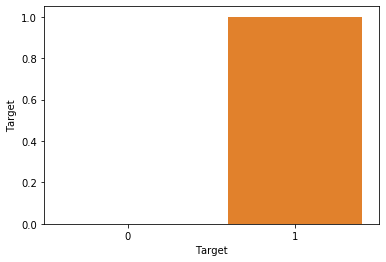

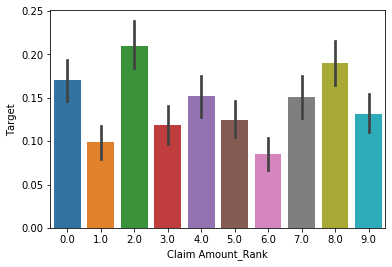

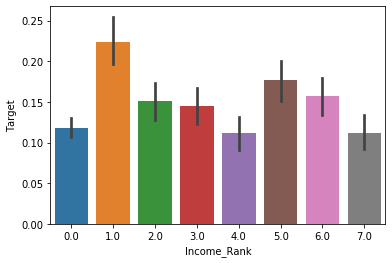

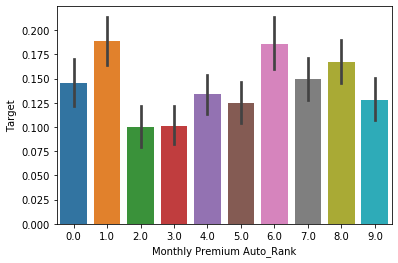

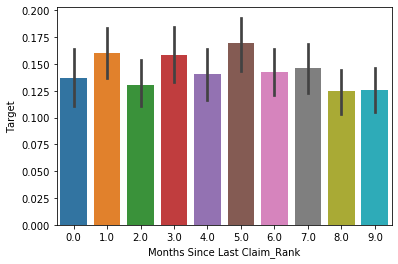

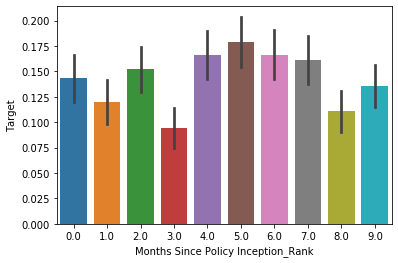

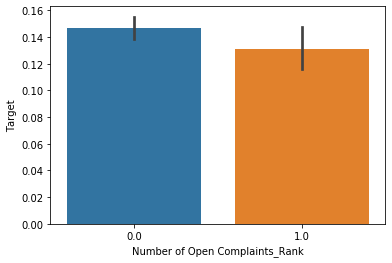

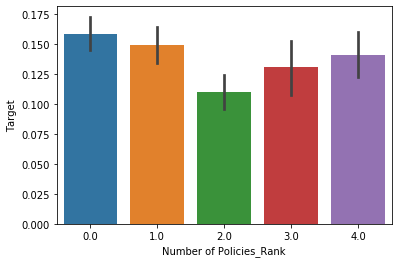

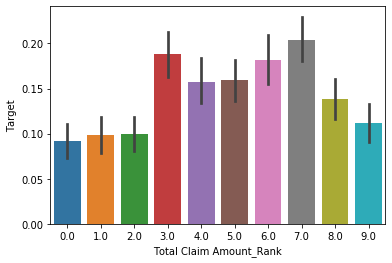

In [20]:
X_bin_combined = pd.concat([Y, num_binned], axis=1, join='inner')

from numpy import mean
for col in X_bin_combined:
    plt.figure()
    sns.barplot(x=col, y='Target', data=X_bin_combined, estimator=mean)
plt.show()    

In [21]:
# Selecting k best features for numerical data
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=8)
x_new = selector.fit_transform(num, Y)
# Get columns to keep and creatimg new dataframe with yhose columns only
cols = selector.get_support(indices=True)
select_features_num = num.iloc[:,cols]

In [22]:
select_features_num.loc[:0]

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147


In [23]:
select_features_num.dtypes

Claim Amount                     float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

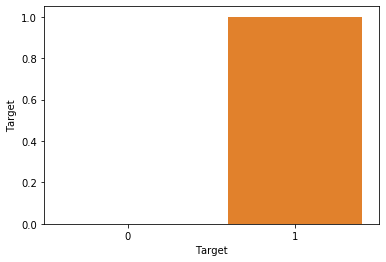

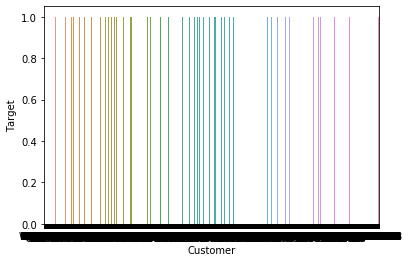

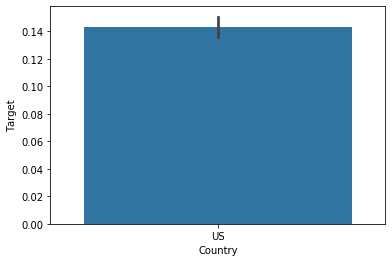

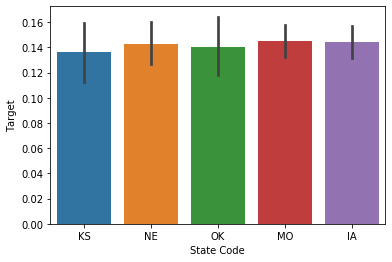

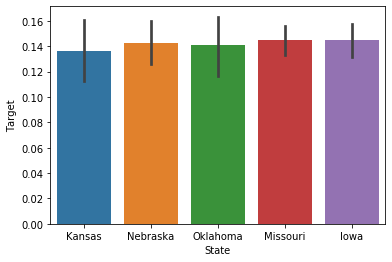

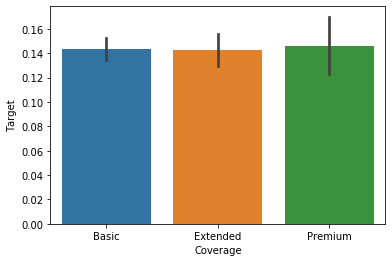

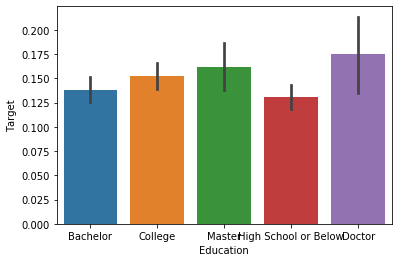

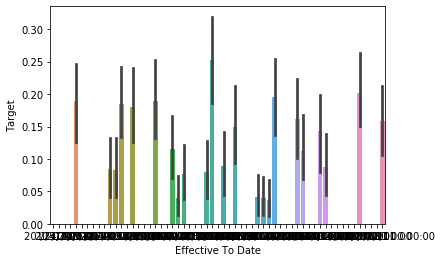

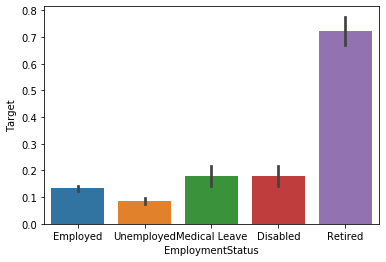

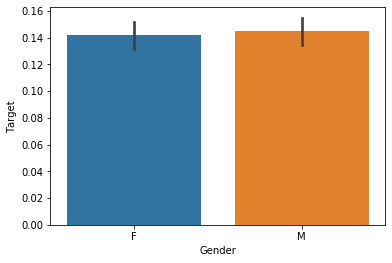

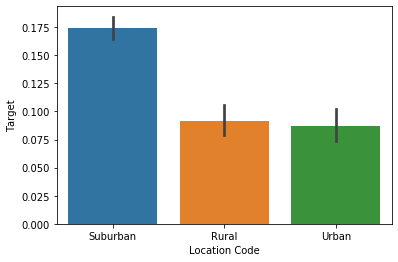

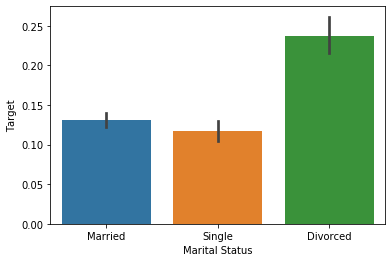

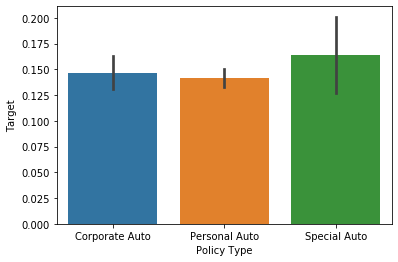

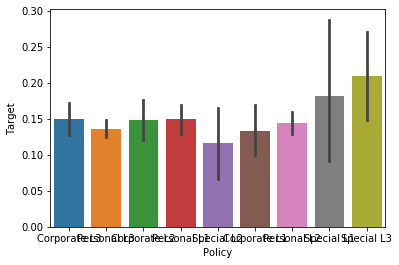

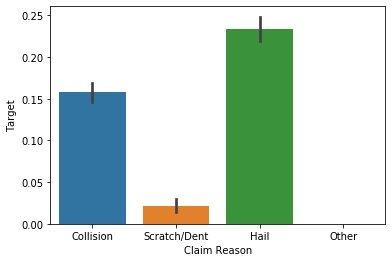

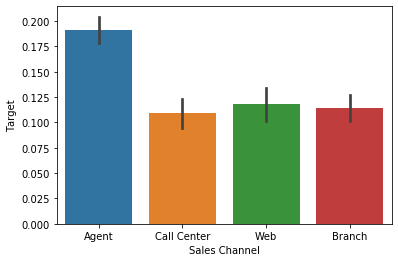

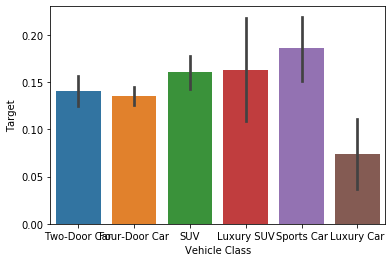

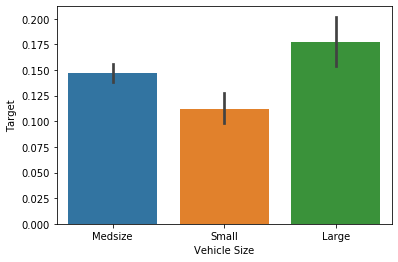

In [24]:
x_char_combined = pd.concat([Y, char], axis=1, join='inner')

from numpy import mean
for col in x_char_combined:
    plt.figure()
    sns.barplot(x=col, y='Target', data=x_char_combined, estimator=mean)
plt.show()    

In [25]:
char_dum = pd.get_dummies(char, drop_first=True)

In [26]:
# Select k best features for categorical data
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=12)
x_new = selector.fit_transform(char_dum, Y)
# Get columns to keep and creatimg new dataframe with yhose columns only
cols = selector.get_support(indices=True)
select_features_char = char_dum.iloc[:,cols]

In [27]:
select_features_char.loc[:0]

,Effective To Date_2011-04-01 00:00:00,Effective To Date_1/22/11,Effective To Date_1/26/11,Effective To Date_1/31/11,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Claim Reason_Hail,Claim Reason_Other,Claim Reason_Scratch/Dent,Sales Channel_Branch
0,0,0,0,0,0,0,1,0,0,0,0,0


In [28]:
select_features_char.dtypes

Effective To Date_2011-04-01 00:00:00    uint8
Effective To Date_1/22/11                uint8
Effective To Date_1/26/11                uint8
Effective To Date_1/31/11                uint8
EmploymentStatus_Retired                 uint8
EmploymentStatus_Unemployed              uint8
Location Code_Suburban                   uint8
Location Code_Urban                      uint8
Claim Reason_Hail                        uint8
Claim Reason_Other                       uint8
Claim Reason_Scratch/Dent                uint8
Sales Channel_Branch                     uint8
dtype: object

In [29]:
# Now bringing all the data together
X_all = pd.concat([select_features_num,select_features_char], axis=1, join='inner')

In [30]:
# Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3)

In [31]:
# Checking the randomness of the data

y_train.mean()

0.14124824026278743

In [32]:
y_test.mean()

0.14775629332360452

In [34]:
# Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
# Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
# Building Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
# Model Valuation
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbc = gbc.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [39]:
from sklearn import metrics

In [40]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_dtree))
print('Precision:', metrics.precision_score(y_test,y_pred_dtree))
print('Recall:', metrics.recall_score(y_test,y_pred_dtree))
print('F1 Score:', metrics.f1_score(y_test,y_pred_dtree))

Accuracy: 0.9616928128420285
Precision: 0.7941176470588235
Recall: 1.0
F1 Score: 0.8852459016393442


In [41]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_rf))
print('Precision:', metrics.precision_score(y_test,y_pred_rf))
print('Recall:', metrics.recall_score(y_test,y_pred_rf))
print('F1 Score:', metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9945275446917183
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


In [42]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_gbc))
print('Precision:', metrics.precision_score(y_test,y_pred_gbc))
print('Recall:', metrics.recall_score(y_test,y_pred_gbc))
print('F1 Score:', metrics.f1_score(y_test,y_pred_gbc))

Accuracy: 0.8734038672017512
Precision: 0.7843137254901961
Recall: 0.19753086419753085
F1 Score: 0.3155818540433925


In [ ]:
# Conclusion : From the above three algos it is clearly visible that the "Random Forest Algo" is the best suited algo for finding the 'Auto Insurance Fraud Detection' as it is giving 99.45% accuracy